In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk

plt.style.use('ggplot')

import nltk





In [3]:
df = pd.read_csv('datasets/reviews.csv')
df.head()
print(df.shape)
df= df.head(1000)

(568454, 10)


# Quick EDA 

Text(0.5, 0, 'review star')

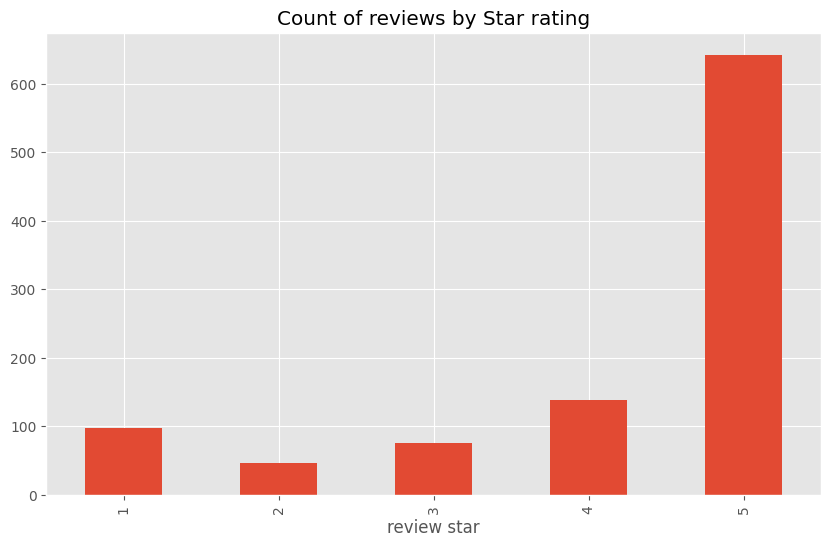

In [4]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of reviews by Star rating',
                                             figsize=(10,6),legend=False)
ax.set_xlabel('review star')

# basic NLTK


In [5]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
tokens = nltk.word_tokenize(example)


In [7]:
tagged= nltk.pos_tag(tokens) #part of speech 
tagged

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [8]:
entites = nltk.chunk.ne_chunk(tagged)
entites.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# Step 1 - VADER sentiment scoring

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.auto import tqdm

sia = SentimentIntensityAnalyzer()


In [10]:
sia.polarity_scores('i am happy')

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [11]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [12]:
res= { }
for i, row in tqdm(df.iterrows(),total=len(df)):
    text = row['Text']
    myid=  row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [14]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.026,0.721,0.253,0.9788,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,0.000,0.786,0.214,0.9309,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,0.000,0.673,0.327,0.9634,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,0.063,0.874,0.062,-0.0129,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


# plotting Vader results 

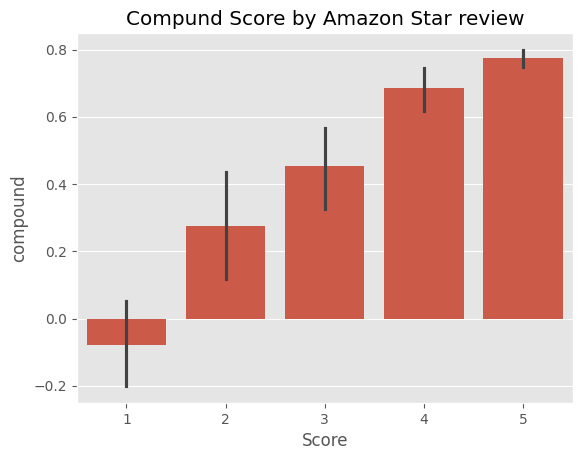

In [15]:
ax =sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compund Score by Amazon Star review')
plt.show()


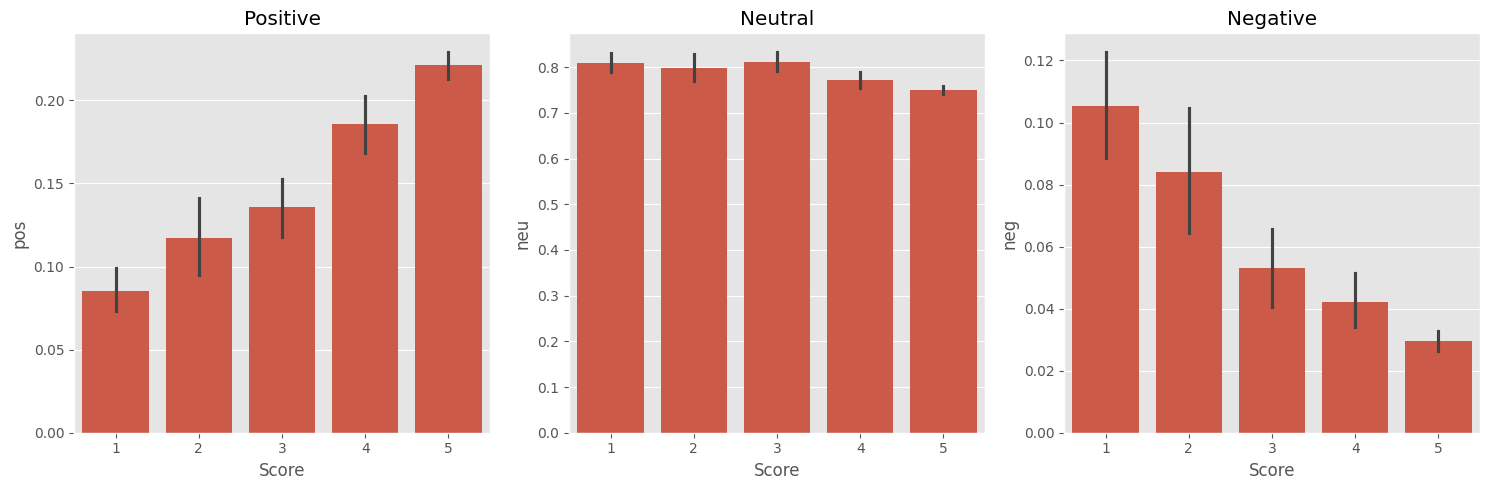

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()


# STEP 3 Roberta Pretrained Model

In [17]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [18]:
MODEL= f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [19]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example , return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2],
    }
    return scores_dict


In [20]:
res = {}
for i , row in tqdm(df.iterrows(),total=len(df)):
    try:
        text = row['Text']
        myid=row['Id']
        vader_res =sia.polarity_scores(text)
        vader_res_rename = {}
        for key , value in vader_res.items():
            vader_res_rename[f"vader_{key}"] = value
        roberta_scores = polarity_scores_roberta(text)
        both = {**vader_res_rename,**roberta_scores}
        res[myid] = both
    except RuntimeError:
        print(f"Error in id {myid}")


  0%|          | 0/1000 [00:00<?, ?it/s]

Error in id 83
Error in id 187
Error in id 529
Error in id 540
Error in id 746
Error in id 863


In [21]:
# Convert results dictionary to DataFrame
results_df = pd.DataFrame.from_dict(res, orient="index")

# Reset index so 'id' becomes a column
results_df = results_df.reset_index().rename(columns={'index': 'Id'})

# Merge back with original df on Id
results_df = results_df.merge(df, on="Id", how="left")


In [22]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## compare scores between models

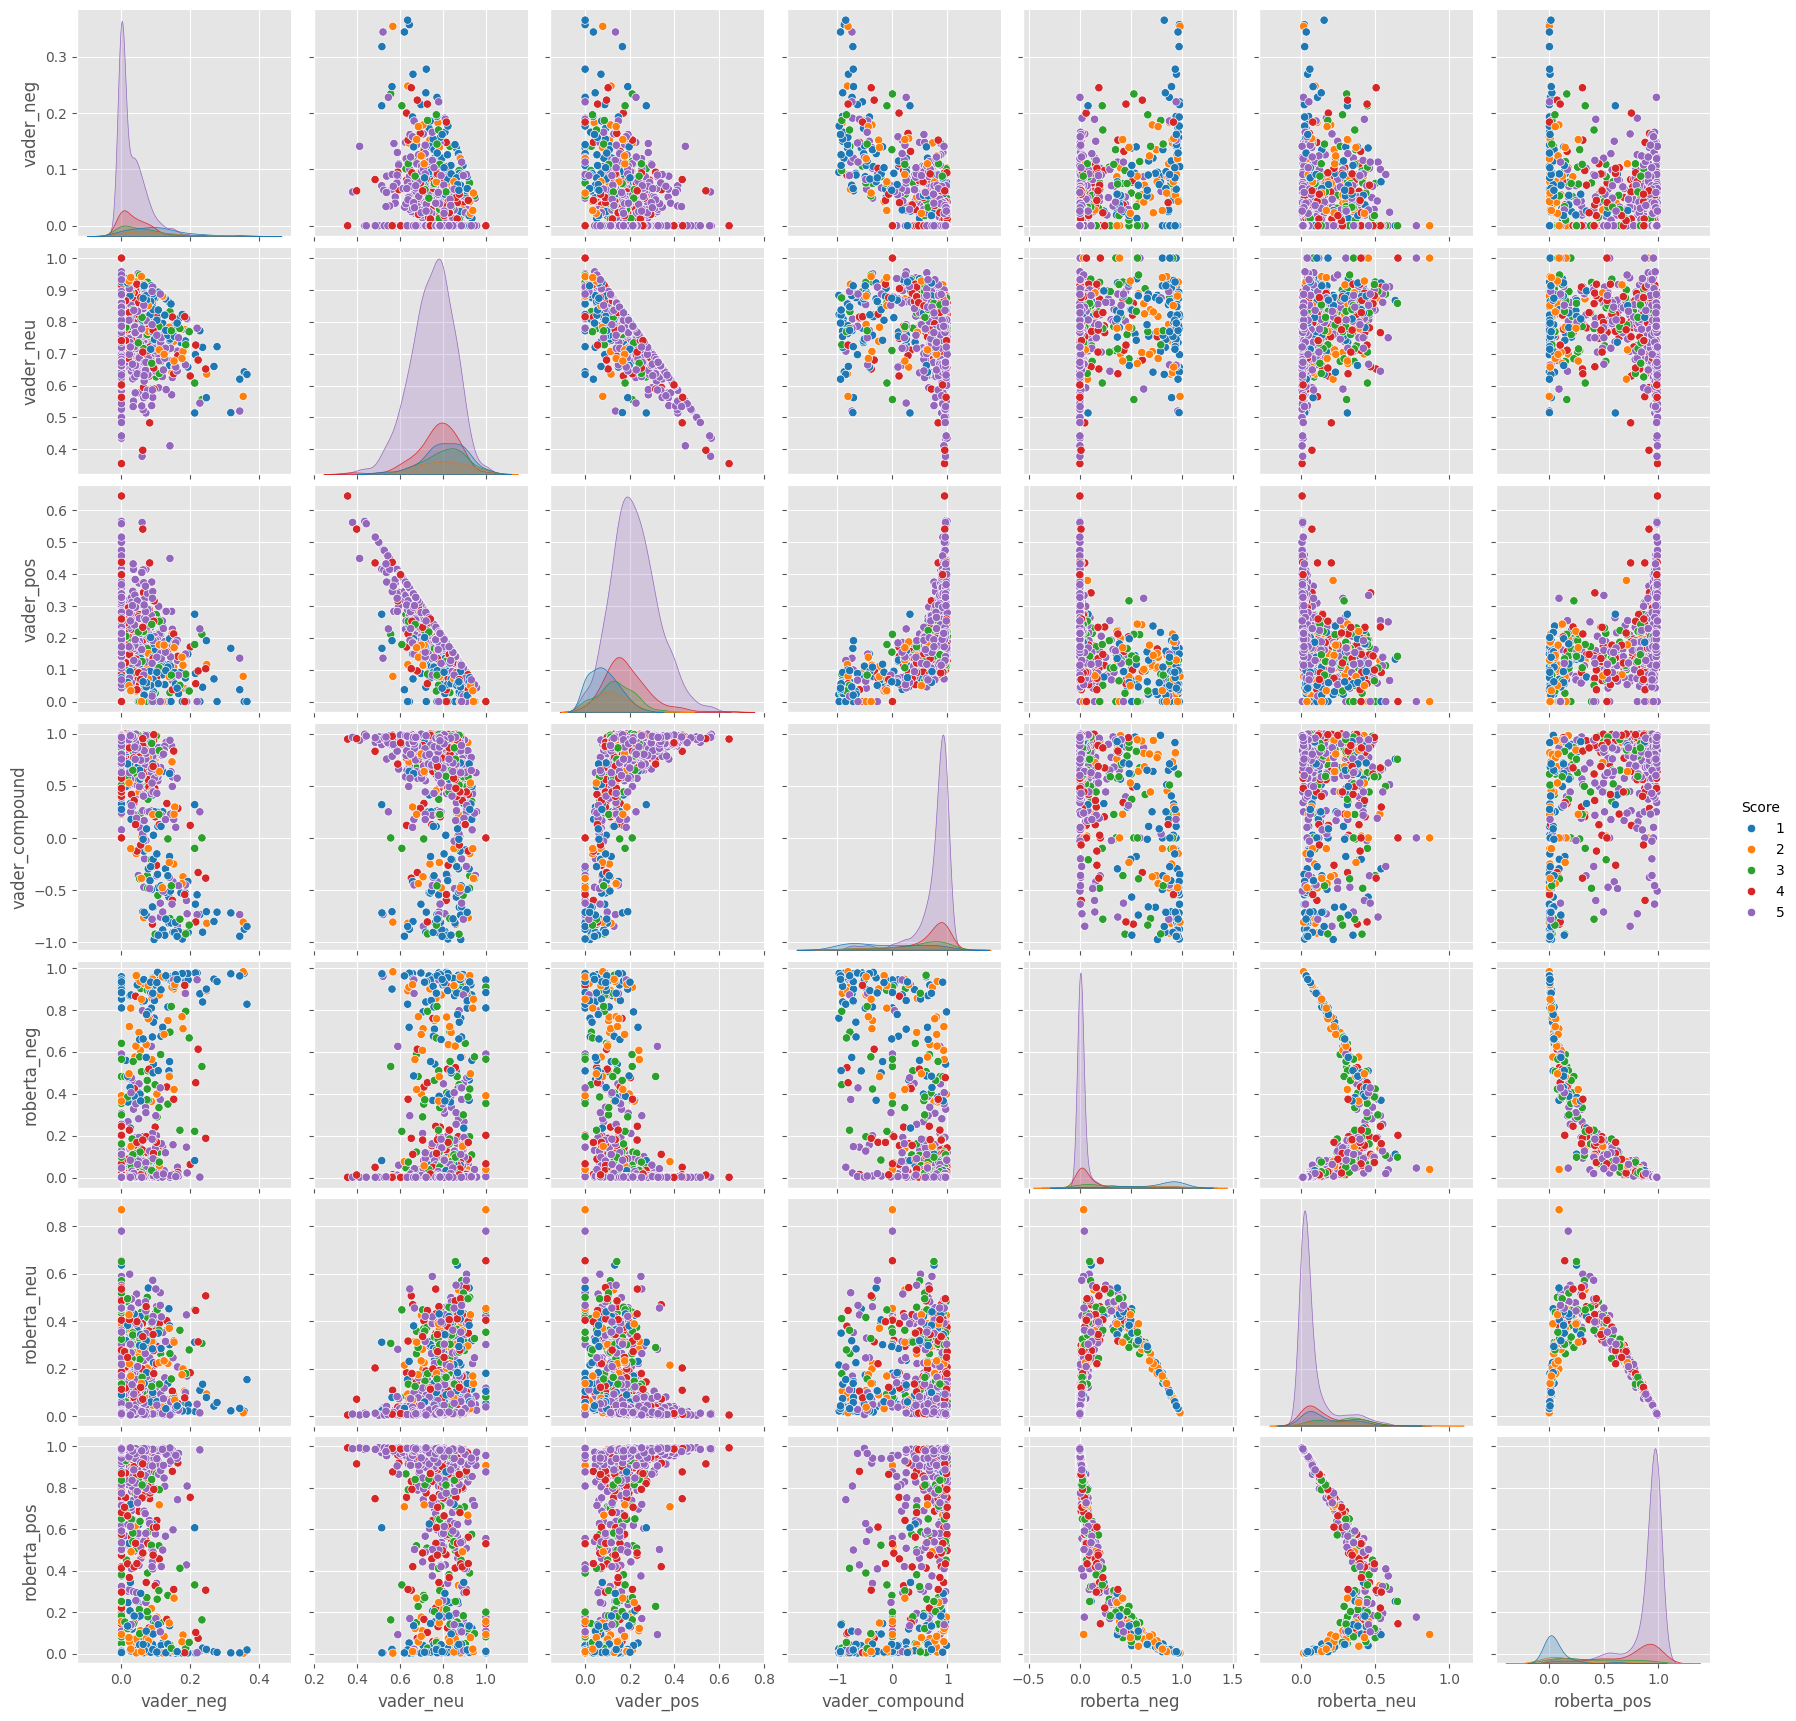

In [23]:
sns.pairplot(data=results_df,vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],hue='Score',palette='tab10')
plt.show()

# visualization Function
## 1. overall Sentiment Distribution 

In [40]:
positive_reviews = results_df[results_df['vader_compound']>0.05]['Text']
Negative_reviews = results_df[results_df['vader_compound']<-0.05]['Text']


##  Most said word in negative and positive reviews

In [29]:
import re 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', text)  # remove special chars/numbers
    words = text.lower().split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

positive_clean = " ".join([clean_text(t) for t in positive_reviews])
negative_clean = " ".join([clean_text(t) for t in Negative_reviews])

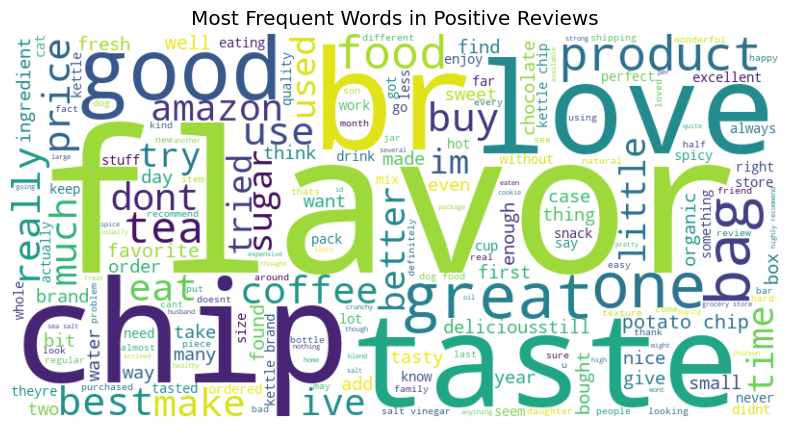

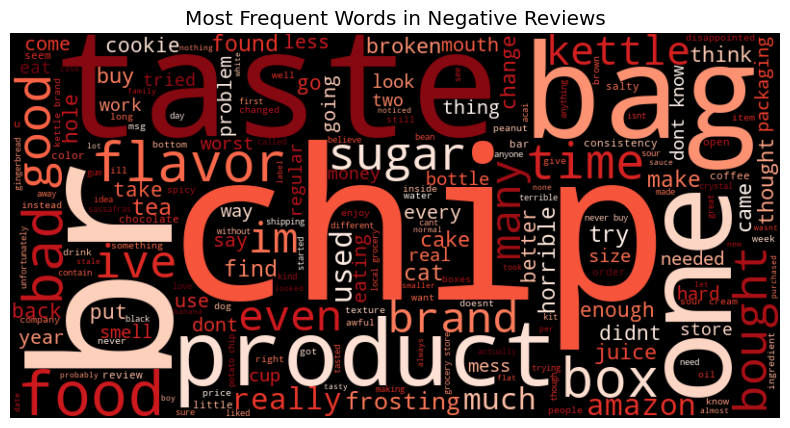

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Positive Word Cloud
wc_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_clean)
plt.figure(figsize=(10,5))
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Positive Reviews")
plt.show()

# Negative Word Cloud
wc_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_clean)
plt.figure(figsize=(10,5))
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Negative Reviews")
plt.show()


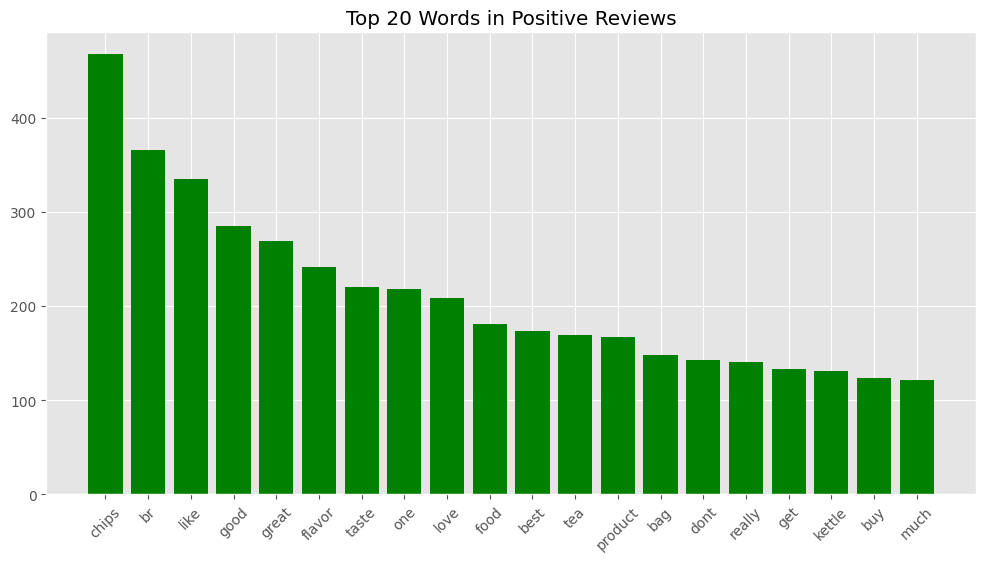

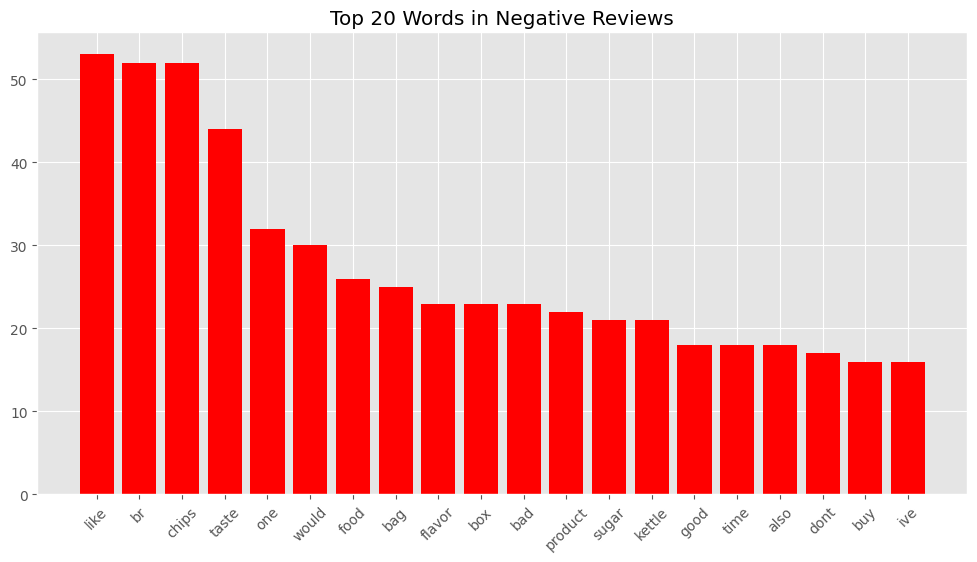

In [31]:
from collections import Counter

# Count words
pos_counts = Counter(positive_clean.split()).most_common(20)
neg_counts = Counter(negative_clean.split()).most_common(20)

# Bar plot
pos_words, pos_freq = zip(*pos_counts)
neg_words, neg_freq = zip(*neg_counts)

plt.figure(figsize=(12,6))
plt.bar(pos_words, pos_freq, color="green")
plt.xticks(rotation=45)
plt.title("Top 20 Words in Positive Reviews")
plt.show()

plt.figure(figsize=(12,6))
plt.bar(neg_words, neg_freq, color="red")
plt.xticks(rotation=45)
plt.title("Top 20 Words in Negative Reviews")
plt.show()


## Histogram of Sentiment Scores 
- Plot histograms of compound scores (both Vader & Roberta).

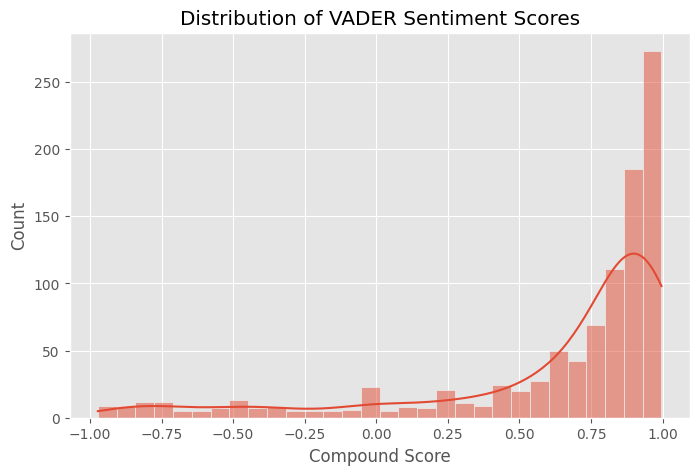

In [51]:
# Histogram for VADER compound score
plt.figure(figsize=(8,5))
sns.histplot(results_df['vader_compound'], bins=30, kde=True)
plt.title("Distribution of VADER Sentiment Scores")
plt.xlabel("Compound Score")
plt.ylabel("Count")
plt.show()

The histogram shows the distribution of VADER compound sentiment scores across reviews.

 - The distribution is heavily right-skewed, with a strong concentration of scores near +1.0, indicating that most reviews are highly positive.

 - A smaller number of reviews fall in the negative range (below -0.05), showing fewer dissatisfied customers.

 - Very few reviews cluster around neutral (0), suggesting that reviewers generally express clear opinions rather than neutral statements.

- how many reviews are positive, neutral, or negative.

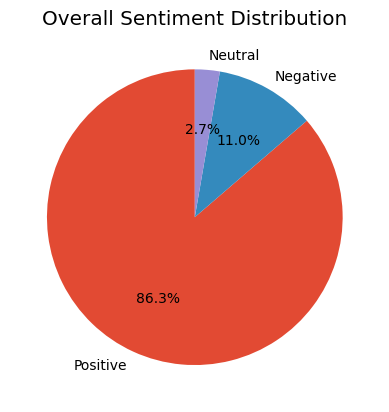

In [50]:
results_df['sentiment'] = results_df['vader_compound'].apply(lambda x: 'Positive' if x>0.05 else ('Negative' if x<-0.05 else 'Neutral'))

sentiment_counts = results_df['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Overall Sentiment Distribution")
plt.show()

The pie chart illustrates the overall sentiment distribution of Amazon reviews.

 - Positive reviews dominate the dataset, making up 86.3% of the total.

 - Negative reviews account for 11.0%, showing that only a small portion of customers expressed dissatisfaction.

 - Neutral reviews are very few at 2.7%, indicating that most customers tend to take a clear stance (positive or negative).

Correlation between Vader compound and Roberta positive prob: 0.671


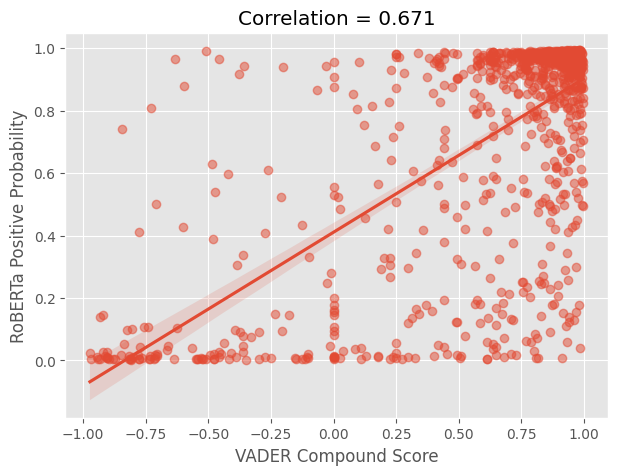

In [61]:
correlation = results_df['vader_compound'].corr(results_df['roberta_pos'])
print(f"Correlation between Vader compound and Roberta positive prob: {correlation:.3f}")

# Scatter plot with regression line
plt.figure(figsize=(7,5))
sns.regplot(x='vader_compound', y='roberta_pos', data=results_df, scatter_kws={'alpha':0.5})
plt.title(f"Correlation = {correlation:.3f}")
plt.xlabel("VADER Compound Score")
plt.ylabel("RoBERTa Positive Probability")
plt.show()

The scatter plot shows the relationship between VADER Compound Score (x-axis) and RoBERTa Positive Probability (y-axis). The correlation coefficient is 0.671, which indicates a moderately strong positive correlation between the two models.
This means that:

    - Reviews rated more positively by VADER also tend to have higher positive probabilities according to RoBERTa.

    -  As VADER scores increase towards 1, RoBERTa predictions also move closer to 1 (strongly positive).

    - There are some outliers where one model predicts positivity while the other doesn’t, but the general trend shows agreement.